In [19]:
import pickle

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

results = {}

with open("results_data_h2o.pkl", 'rb') as pickle_file:
   results_h20  = pickle.load(pickle_file)
   results.update(results_h20)

with open("results_data_pbcl2.pkl", 'rb') as pickle_file:
   results_pbcl2  = pickle.load(pickle_file)
   results.update(results_pbcl2)

with open("results_data_au2.pkl", 'rb') as pickle_file:
   results_au2  = pickle.load(pickle_file)
   results.update(results_au2)

filteredresults = {}
        
systems = set()
for k in results:
   system = k.split(";")[0]
   systems.add (system)
   krgrid = int(k.split(";")[-2])
   kagrid = int(k.split(";")[-1])

   if system not in filteredresults:
      filteredresults[system] = []

   res = results[k].decode("utf-8").split("\n")
    
   totfitdens = float(res[1].split()[-1])
   totanadens = float(res[3].split()[-1])
   totalitera = int(res[4].split()[-2])
   totalenerg = float(res[5].split()[-1])

   difference = abs(totanadens - totfitdens)

   filteredresults[system].append([krgrid, kagrid, difference, totalenerg, totalitera])

   #print(system, krgrid, kagrid, difference, totalenerg)

array = np.asarray(filteredresults["H2O"])
X, Y = np.meshgrid(array[:,0], array[:,1])

print(X)
print(Y)

Z = np.zeros(X.shape, dtype=float)
for idxx, valx in enumerate(array[:,0]):
    for idxy, valy in enumerate(array[:,1]):
        uno = np.where(array[:,0] == valx)
        due = np.where(array[:,1] == valy)
        idx = np.intersect1d(uno, due)

        zval = array[idx,2]

        Z[idxx, idxy] = zval

In [20]:
import numpy as np
from mpl_toolkits import mplot3d

def getdatafiltered (filteredresults, system):

    array = np.asarray(filteredresults[system])

    krgrid_effect_x = []
    krgrid_effect_diff = []
    krgrid_effect_energy = []
    krgrid_effect_iterations = []

    kagrid_effect_x = []
    kagrid_effect_diff = []
    kagrid_effect_energy = []
    kagrid_effect_iterations = []

    overall_effect = [] 
    for idx in range(array.shape[0]):
        krgrid = array[idx,0]
        kagrid = array[idx,1]
        diff = array[idx,2]
        energy = array[idx,3]
        iter = array[idx,4]

        if krgrid == -1.0:
            kagrid_effect_x.append(kagrid)
            kagrid_effect_diff.append(diff)
            kagrid_effect_energy.append(energy)
            kagrid_effect_iterations.append(iter)
        elif kagrid == -1.0:
            krgrid_effect_x.append(krgrid)
            krgrid_effect_diff.append(diff)
            krgrid_effect_energy.append(energy)
            krgrid_effect_iterations.append(iter)
        else:
            overall_effect.append([krgrid, kagrid, diff, energy, iter])

    return krgrid_effect_x, krgrid_effect_diff, krgrid_effect_energy, krgrid_effect_iterations, \
        kagrid_effect_x, kagrid_effect_diff, kagrid_effect_energy, kagrid_effect_iterations, \
            overall_effect


KAGRID EFFECT

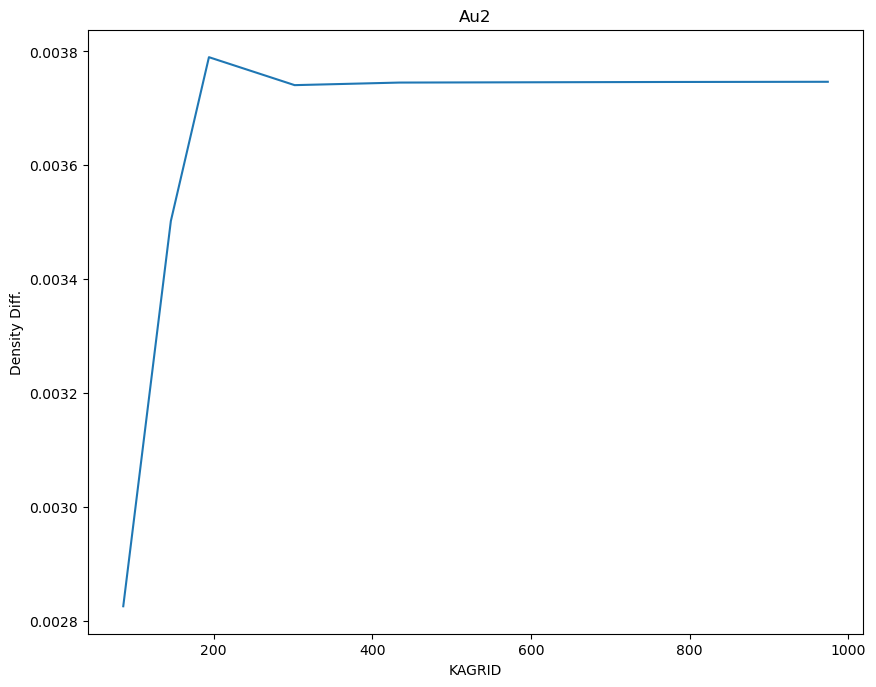

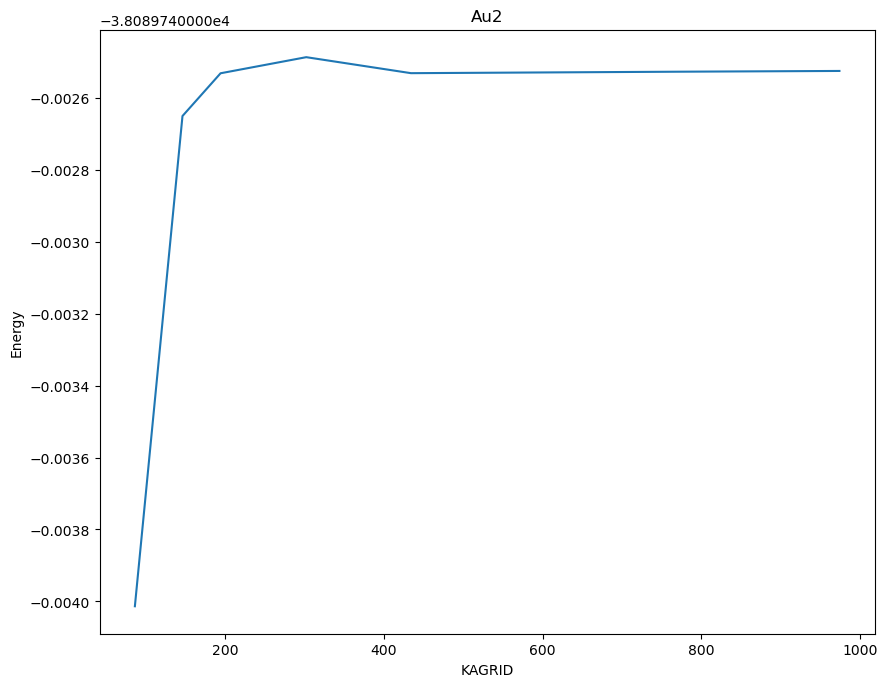

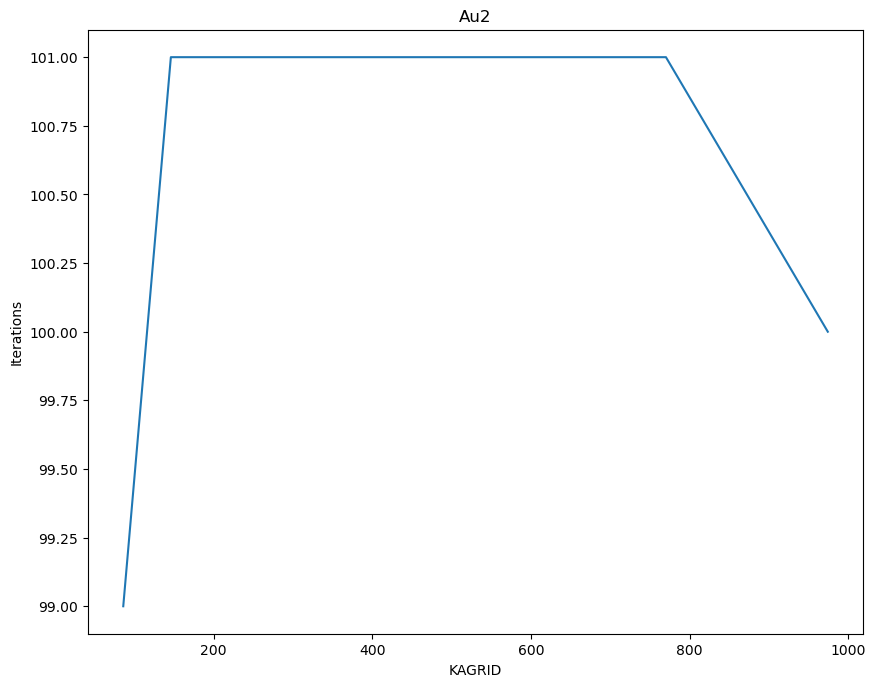

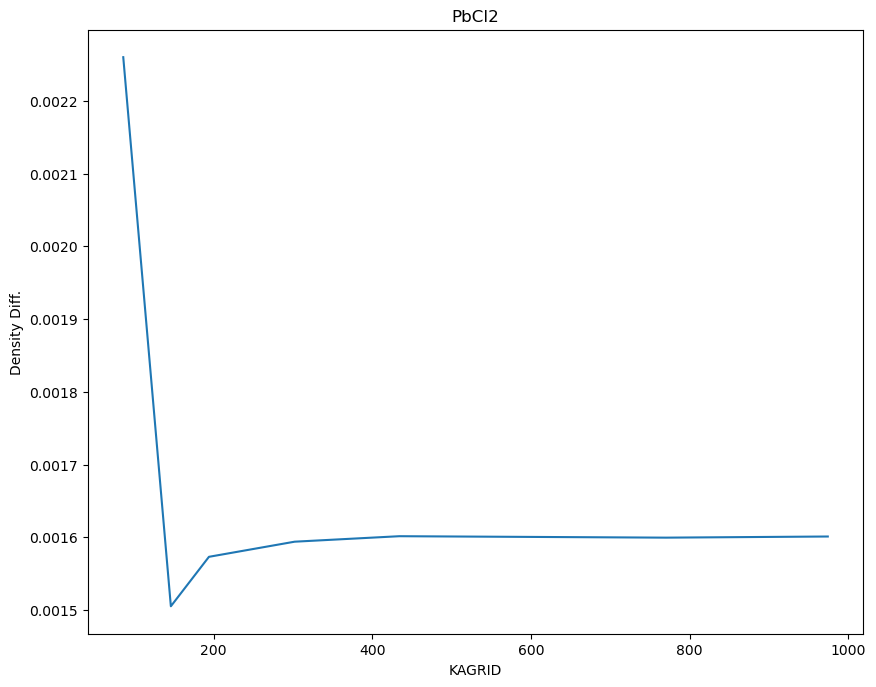

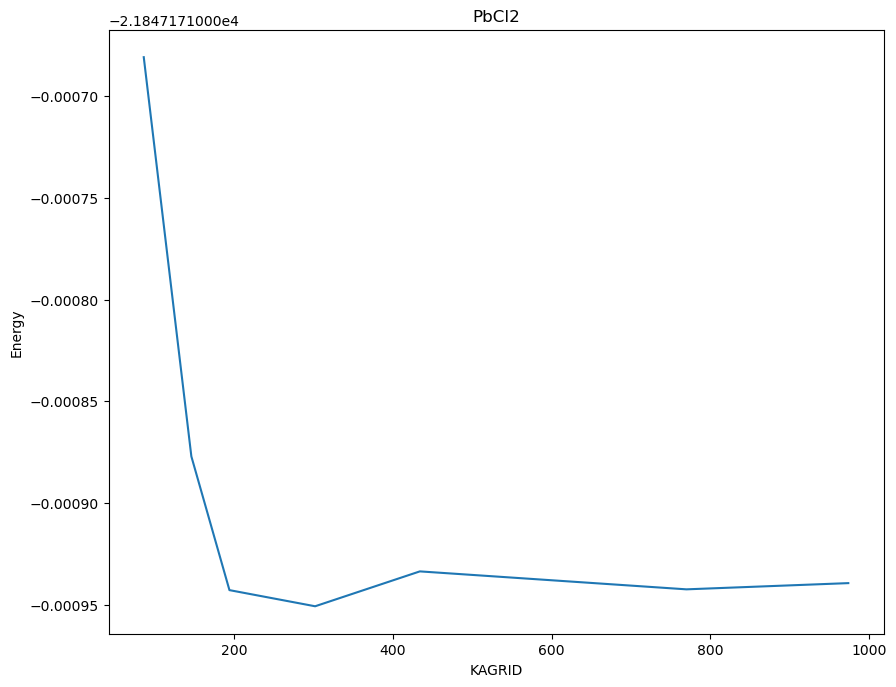

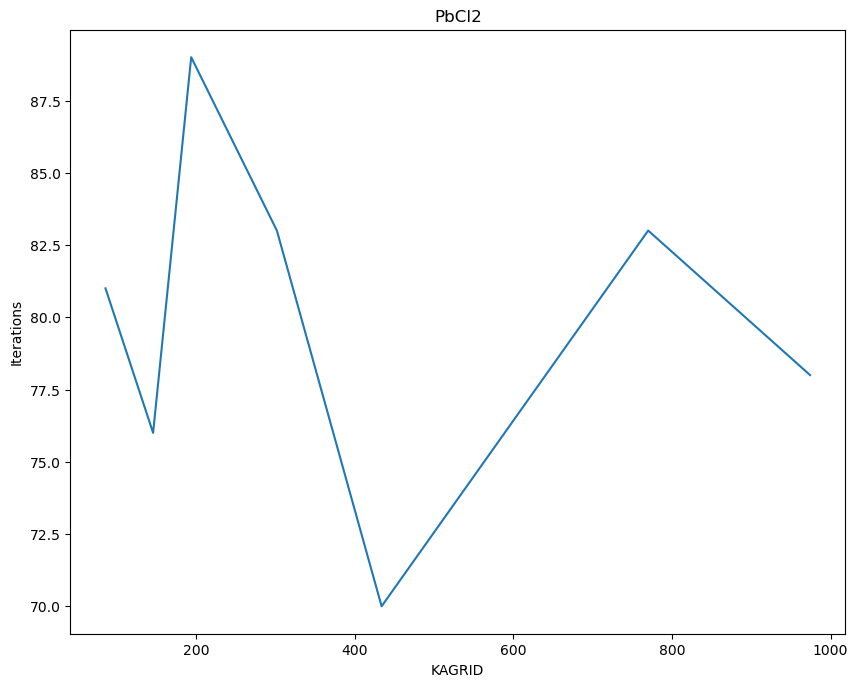

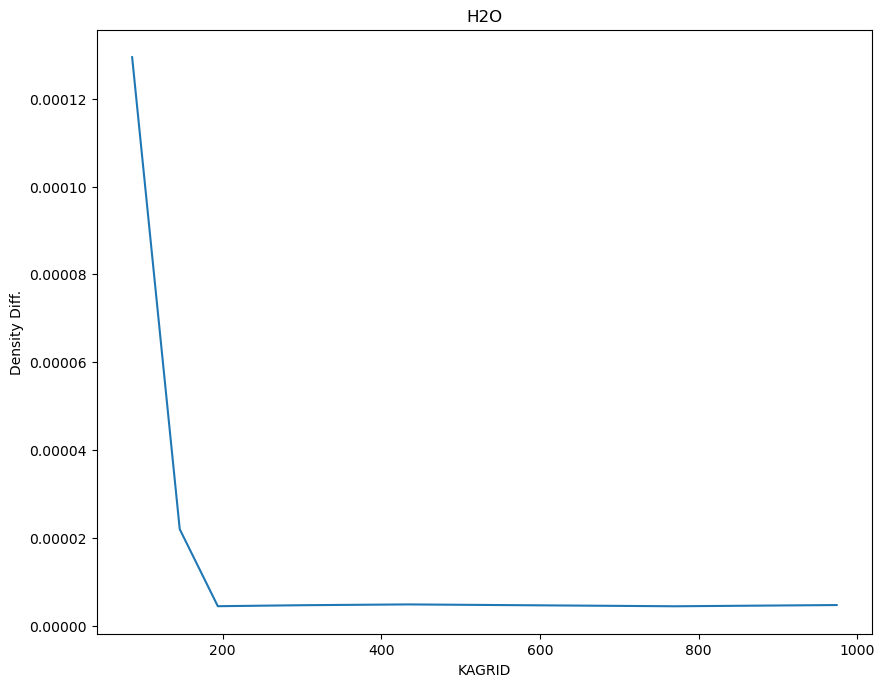

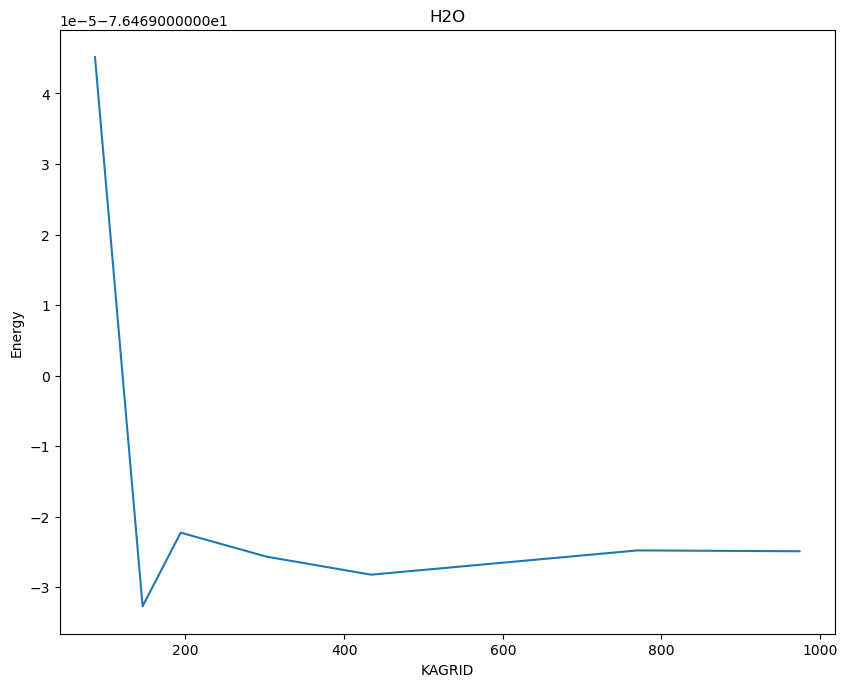

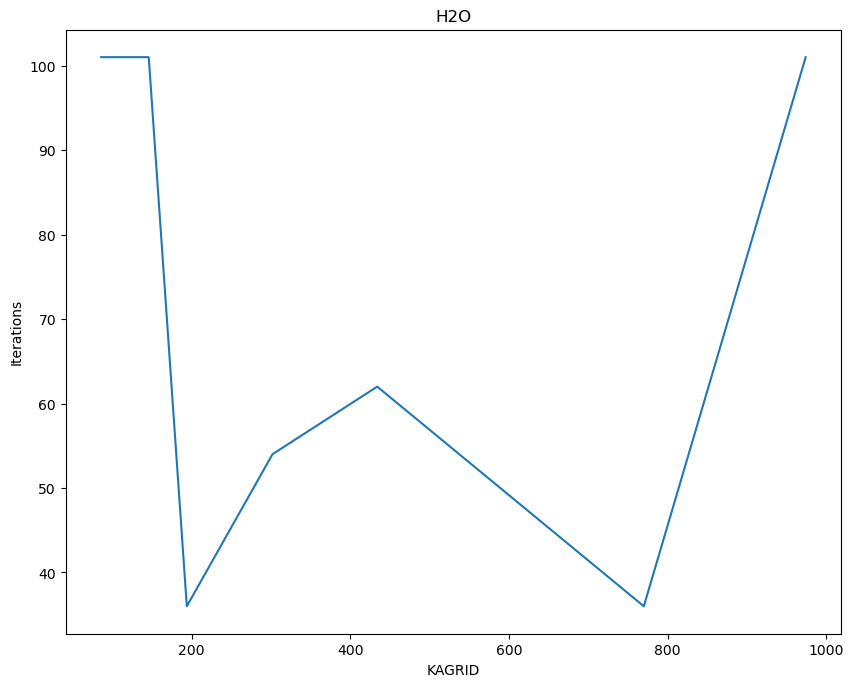

In [21]:
for system in systems:
    krgrid_effect_x, krgrid_effect_diff, krgrid_effect_energy, krgrid_effect_iterations, \
        kagrid_effect_x, kagrid_effect_diff, kagrid_effect_energy, kagrid_effect_iterations, \
            overall_effect = getdatafiltered (filteredresults, system)


    figure(figsize=(10, 8), dpi=100)
    ax = plt.subplot()
    ax.plot (kagrid_effect_x, kagrid_effect_diff)
    ax.set_title(system)
    ax.set_xlabel("KAGRID")
    ax.set_ylabel("Density Diff.")
    plt.show()

    figure(figsize=(10, 8), dpi=100)
    ax = plt.subplot()
    ax.plot (kagrid_effect_x, kagrid_effect_energy)
    ax.set_title(system)
    ax.set_xlabel("KAGRID")
    ax.set_ylabel("Energy")
    plt.show()

    figure(figsize=(10, 8), dpi=100)
    ax = plt.subplot()  
    ax.plot (kagrid_effect_x, kagrid_effect_iterations)
    ax.set_title(system)
    ax.set_xlabel("KAGRID")
    ax.set_ylabel("Iterations")
    plt.show()

KRGRID EFFECT

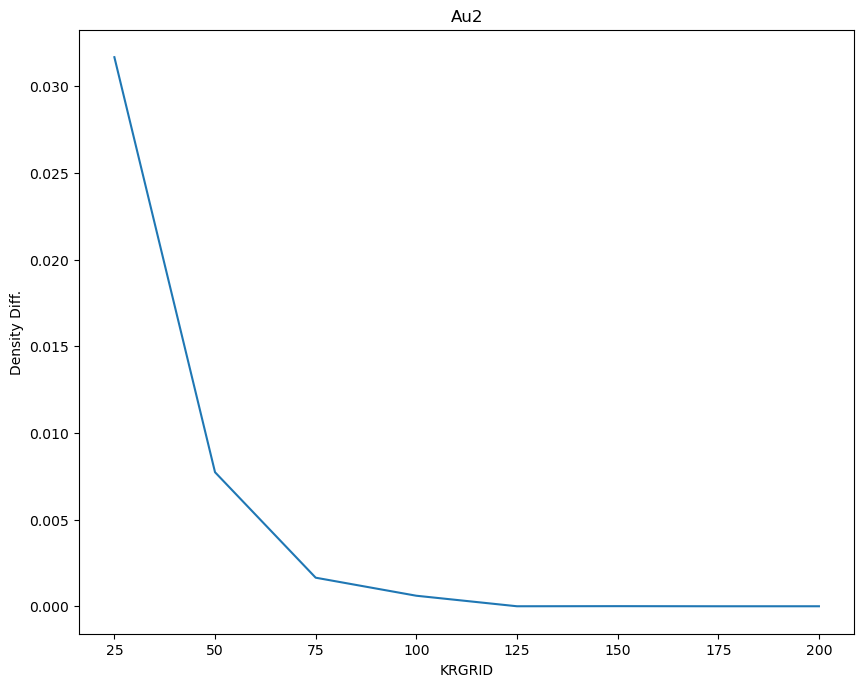

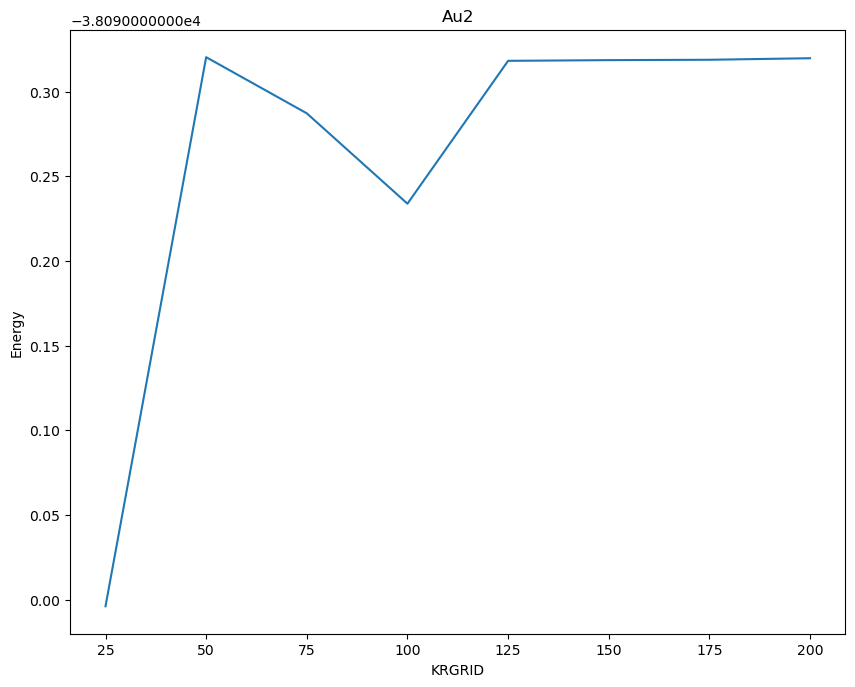

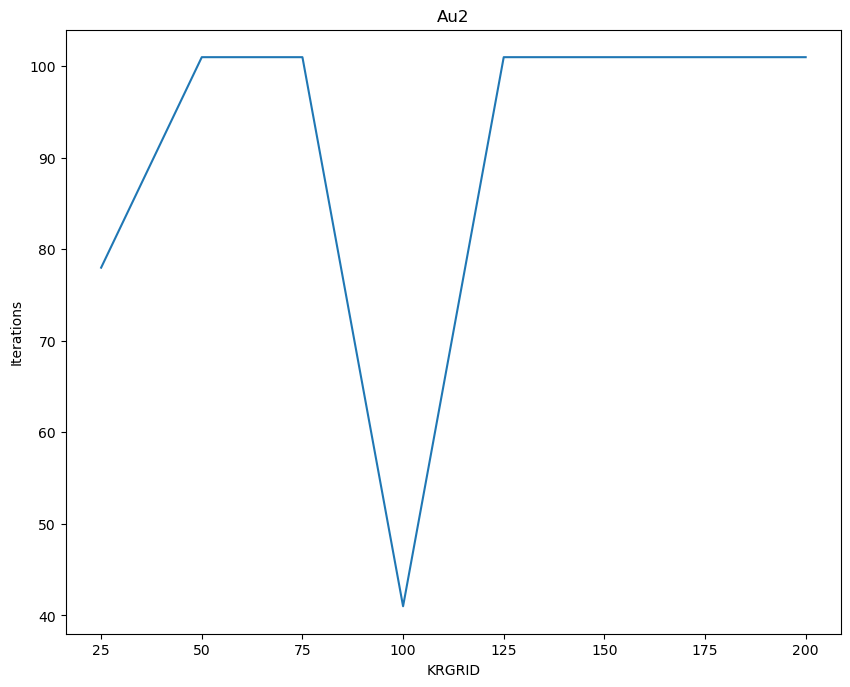

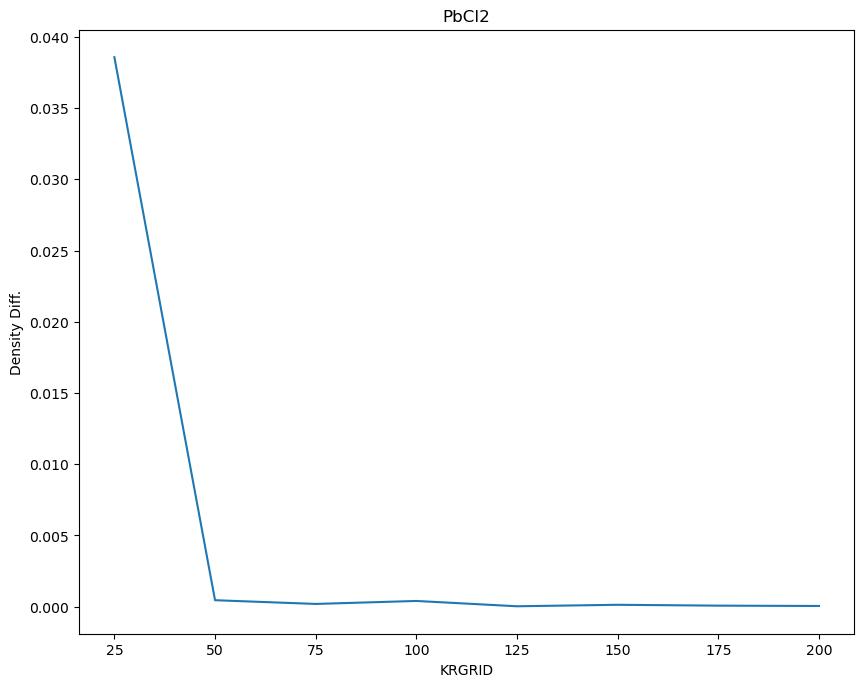

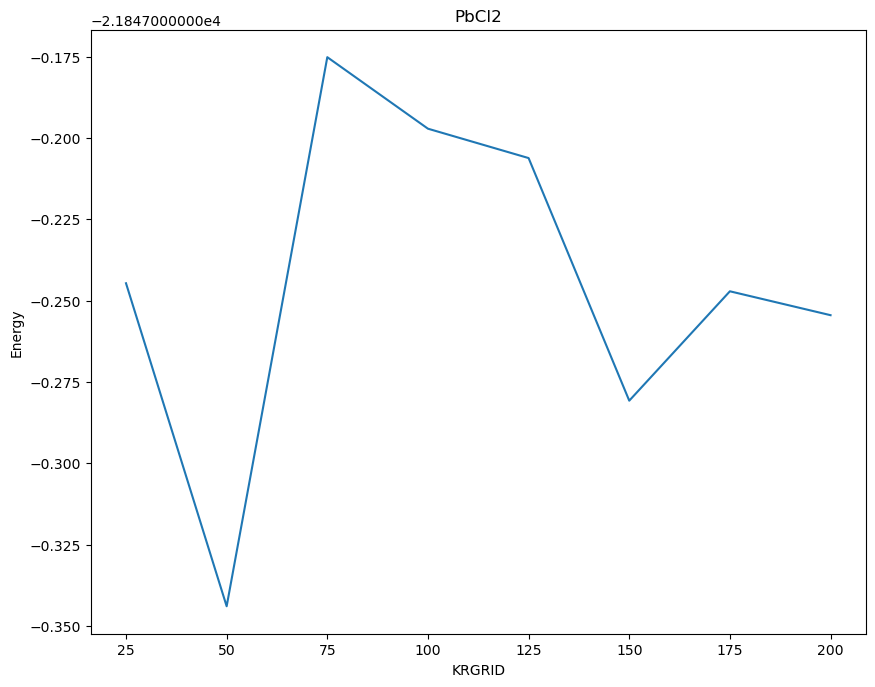

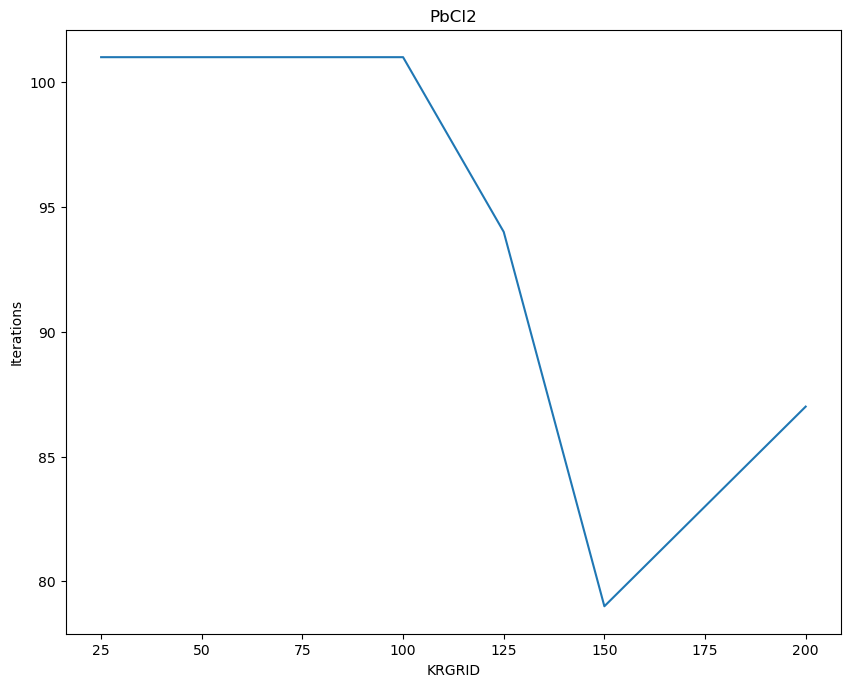

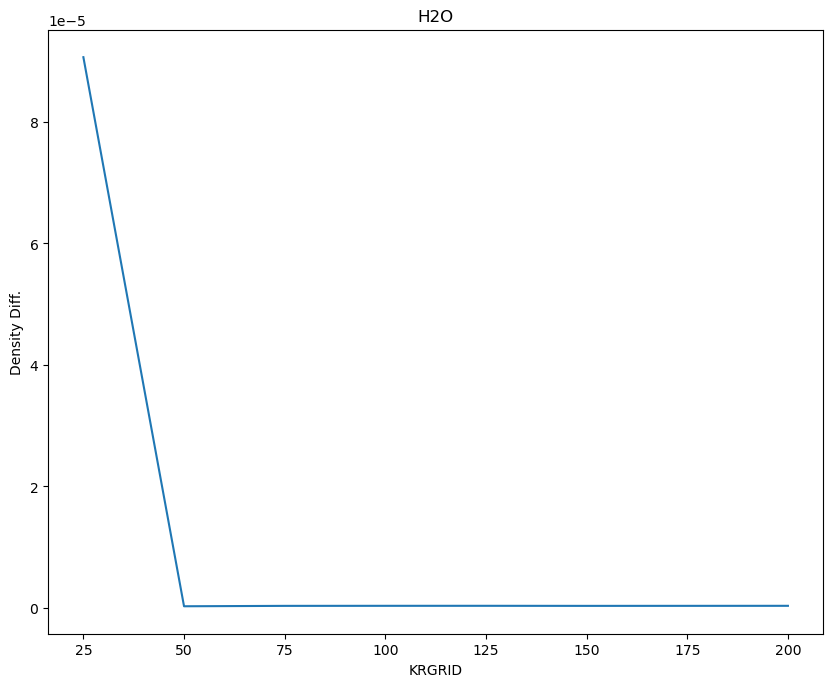

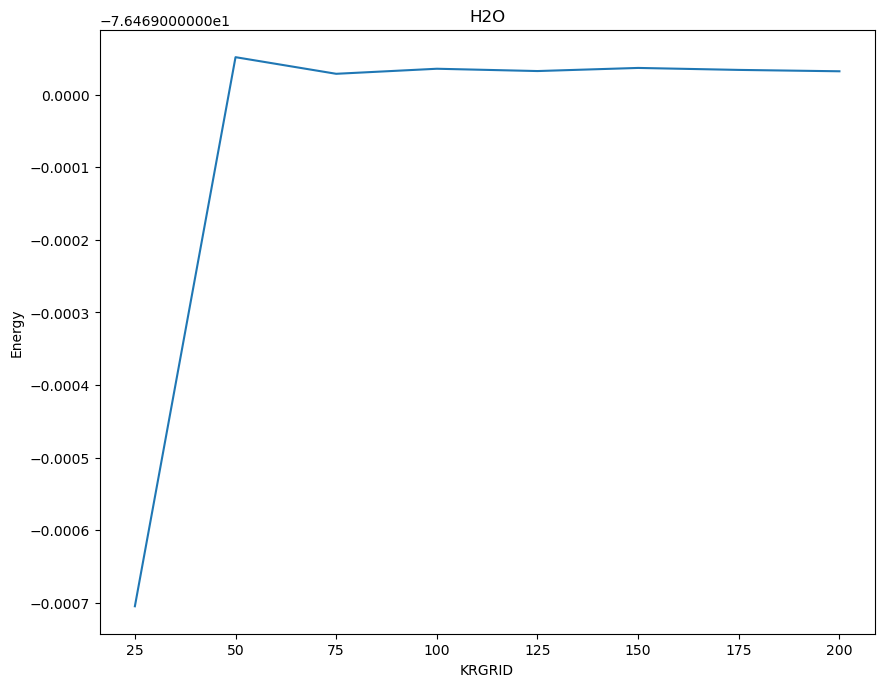

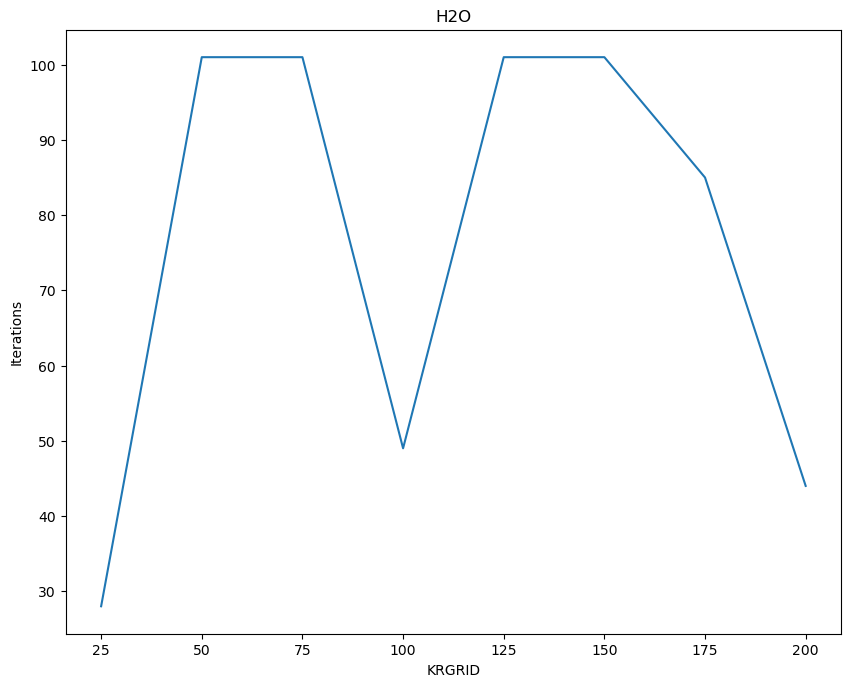

In [22]:
for system in systems:
    krgrid_effect_x, krgrid_effect_diff, krgrid_effect_energy, krgrid_effect_iterations, \
        kagrid_effect_x, kagrid_effect_diff, kagrid_effect_energy, kagrid_effect_iterations, \
            overall_effect = getdatafiltered (filteredresults, system)
    
    figure(figsize=(10, 8), dpi=100)
    ax = plt.subplot()
    ax.plot (krgrid_effect_x, krgrid_effect_diff)
    ax.set_title(system)
    ax.set_xlabel("KRGRID")
    ax.set_ylabel("Density Diff.")
    plt.show()

    figure(figsize=(10, 8), dpi=100)
    ax = plt.subplot()
    ax.plot (krgrid_effect_x, krgrid_effect_energy)
    ax.set_title(system)
    ax.set_xlabel("KRGRID")
    ax.set_ylabel("Energy")
    plt.show()

    figure(figsize=(10, 8), dpi=100)
    ax = plt.subplot()
    ax.plot (krgrid_effect_x, krgrid_effect_iterations)
    ax.set_title(system)
    ax.set_xlabel("KRGRID")
    ax.set_ylabel("Iterations")
    plt.show()

OVERALL EFFECT

In [31]:
from PyGnuplot import gp
import os

for system in systems:
    krgrid_effect_x, krgrid_effect_diff, krgrid_effect_energy, krgrid_effect_iterations, \
        kagrid_effect_x, kagrid_effect_diff, kagrid_effect_energy, kagrid_effect_iterations, \
            overall_effect = getdatafiltered (filteredresults, system)

    krgrid = np.asarray(overall_effect)[:,0]
    kagrid = np.asarray(overall_effect)[:,1]
    difference = np.asarray(overall_effect)[:,2] 
    totalenerg = np.asarray(overall_effect)[:,3] 
    totalitera = np.asarray(overall_effect)[:,4] 

    g = gp()
    g.save(data=[krgrid, kagrid, difference], filename = system+'tmp.dat')
    g.c("set title \"" + system +"\"")
    g.c('set xlabel "krgrid"')
    g.c('set ylabel "kagrid"')
    g.c('set zlabel "Density Diff."')
    g.c('set grid')
    g.c('set hidden3d')
    g.c('splot "'+system+'tmp.dat" u 1:2:3 w p lw 3')
    #g.c('splot "tmp.dat" with lines')
    #g.pdf('myfigure.pdf')

    #os.remove("tmp.dat")
       

In [32]:
for system in systems:
    krgrid_effect_x, krgrid_effect_diff, krgrid_effect_energy, krgrid_effect_iterations, \
        kagrid_effect_x, kagrid_effect_diff, kagrid_effect_energy, kagrid_effect_iterations, \
            overall_effect = getdatafiltered (filteredresults, system)
    
    krgrid = np.asarray(overall_effect)[:,0]
    kagrid = np.asarray(overall_effect)[:,1]
    difference = np.asarray(overall_effect)[:,2] 
    totalenerg = np.asarray(overall_effect)[:,3] 
    totalitera = np.asarray(overall_effect)[:,4] 
    
    g.save(data=[krgrid, kagrid, totalenerg], filename = system+'tmp.dat')
    g.c("set title \"" + system +"\"")
    g.c('set xlabel "krgrid"')
    g.c('set ylabel "kagrid"')
    g.c('set zlabel "Energy"')
    g.c('set grid')
    g.c('set hidden3d')
    g.c('splot "'+system+'tmp.dat" u 1:2:3 w p lw 3')

In [33]:
for system in systems:
    krgrid_effect_x, krgrid_effect_diff, krgrid_effect_energy, krgrid_effect_iterations, \
        kagrid_effect_x, kagrid_effect_diff, kagrid_effect_energy, kagrid_effect_iterations, \
            overall_effect = getdatafiltered (filteredresults, system)
       
    krgrid = np.asarray(overall_effect)[:,0]
    kagrid = np.asarray(overall_effect)[:,1]
    difference = np.asarray(overall_effect)[:,2] 
    totalenerg = np.asarray(overall_effect)[:,3] 
    totalitera = np.asarray(overall_effect)[:,4] 
    
    g.save(data=[krgrid, kagrid, totalitera], filename = system+'tmp.dat')
    g.c('set xlabel "krgrid"')
    g.c('set ylabel "kagrid"')
    g.c('set zlabel "Iterations"')
    g.c('set grid')
    g.c('set hidden3d')
    g.c('splot "'+system+'tmp.dat" u 1:2:3 w p lw 3')
